In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

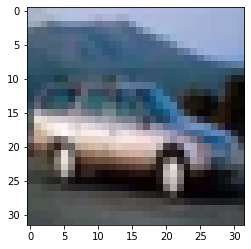

In [11]:
plt.figsize
plt.imshow(X_train[4])

In [12]:
y_train.shape

(50000, 1)

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
y_train = y_train.reshape(-1,)

In [16]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
classesList = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
def showImg(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classesList[y[index]])
    

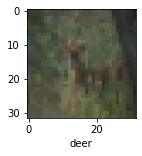

In [20]:
showImg(X_train,y_train,10)

In [21]:
X_train = X_train/255
X_test = X_test/255

In [22]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation ="relu"),
    layers.Dense(1000,activation ="relu"),
    layers.Dense(10,activation ="sigmoid"),
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics =['accuracy']
           )
ann.fit(X_train,y_train, epochs =5 )

Epoch 1/5
1563/1563 [==============================] - 119s 68ms/step - loss: 1.8090 - accuracy: 0.3551s - loss: 1.8093 - accu
Epoch 2/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.6231 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.5406 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4815 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.4304 - accuracy: 0.4966


In [23]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 9s 26ms/step - loss: 1.5038 - accuracy: 0.4559 1s - los


[1.5037620067596436, 0.45590001344680786]

In [27]:
#cnn
cnn = models.Sequential([
    #cnn layers
    layers.Conv2D(filters = 32, kernel_size=(3,3),  activation = "relu", input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size=(3,3),  activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    #dense layers
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

In [28]:
cnn.compile(optimizer = "adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ['accuracy'
            ]
)

In [29]:
cnn.fit(X_train,y_train, epochs =10)

Epoch 1/10
1563/1563 [==============================] - 59s 30ms/step - loss: 1.4062 - accuracy: 0.4960
Epoch 2/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0698 - accuracy: 0.6268
Epoch 3/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9427 - accuracy: 0.6728
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8479 - accuracy: 0.7035
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7788 - accuracy: 0.72980s - loss: 0
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7173 - accuracy: 0.7517
Epoch 7/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6620 - accuracy: 0.7703
Epoch 8/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6148 - accuracy: 0.7872
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5686 - accuracy: 0.8008
Epoch 10/10
1563/1563 [=============================

In [30]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [31]:
y_test = y_test.reshape(-1,)

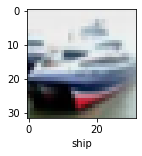

In [32]:
showImg(X_test,y_test,1)

In [33]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.9535 - accuracy: 0.6987


[0.9535430669784546, 0.6987000107765198]

In [34]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.49099459e-03, 5.25445539e-05, 1.76795147e-04, 6.72488570e-01,
        1.63223216e-04, 1.82810575e-01, 1.78985149e-02, 5.59163652e-07,
        1.24870345e-01, 4.78865477e-05],
       [7.51130108e-04, 6.59446865e-02, 4.45712146e-07, 1.18945120e-08,
        8.68074324e-09, 4.82001661e-10, 4.08223011e-10, 6.83683998e-10,
        9.33199942e-01, 1.03828053e-04],
       [4.30136174e-02, 6.89332902e-01, 2.77124927e-04, 1.07667795e-04,
        4.64743571e-05, 5.70180009e-06, 6.07909260e-06, 1.37326188e-05,
        2.64284343e-01, 2.91241286e-03],
       [9.50619936e-01, 7.43271271e-03, 1.53397471e-02, 1.37150069e-04,
        7.52424705e-04, 5.41156524e-08, 3.96696805e-06, 2.28940371e-05,
        2.52058003e-02, 4.85259690e-04],
       [2.88878200e-05, 3.54161311e-04, 7.65037313e-02, 3.29765789e-02,
        7.55146861e-01, 1.44978438e-03, 1.33510485e-01, 3.47449642e-08,
        2.94157817e-05, 4.76996220e-08]], dtype=float32)

In [37]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [41]:
classesList[y_classes[1]]

'ship'

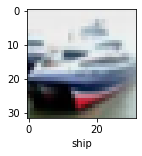

In [42]:
showImg(X_test,y_test,1)